In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Reading Datasets

In [21]:
walmart = pd.read_csv('walmart_cleaned.csv')
recipe = pd.read_csv('merged_recipe_price_nodupl (1).csv')
recipe.head(2)

,title,ingredient,amount,unit,matched_product,match_score,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE
0,No-Bake Nut Cookies,brown sugar,1.0,c,johnsonville brown sugar honey breakfast saus...,100.0,Johnsonville Brown Sugar & Honey Breakfast Sau...,johnsonville,3.98,3.98,12.0
1,No-Bake Nut Cookies,milk,0.5,c,russell stover sugar free milk chocolate pecan...,100.0,Russell Stover Sugar Free Milk Chocolate Pecan...,russell stover,2.18,2.18,3.0


## Exploratory Data Analysis

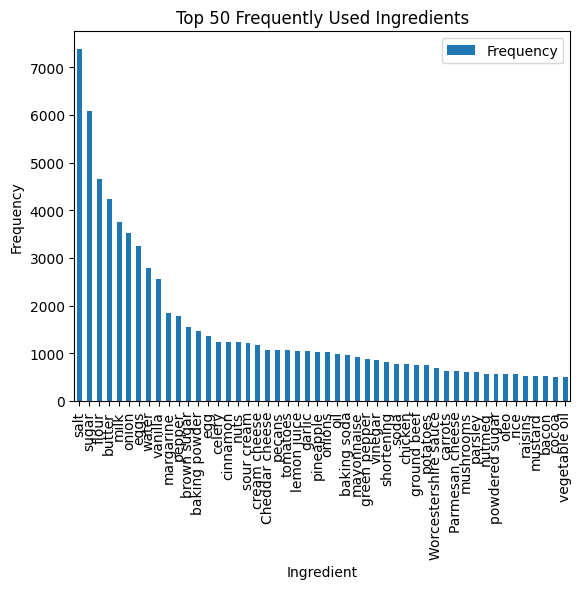

In [22]:
recipe["Frequency"] = recipe["ingredient"].map(recipe["ingredient"].value_counts())
df = recipe.drop_duplicates(subset = ["ingredient"])
sorted = df.sort_values(by="Frequency", ascending = False)
top = sorted.head(50)
top.plot(x="ingredient", y="Frequency", kind = "bar", title="Top 50 Frequently Used Ingredients")
plt.ylabel("Frequency")
plt.xlabel("Ingredient")
plt.show()

The average number of ingredients is 9.689860697207013
The average total price is 43.297720562755565


Text(0.5, 1.0, 'Number of Ingredients vs. Total Price per Recipe')

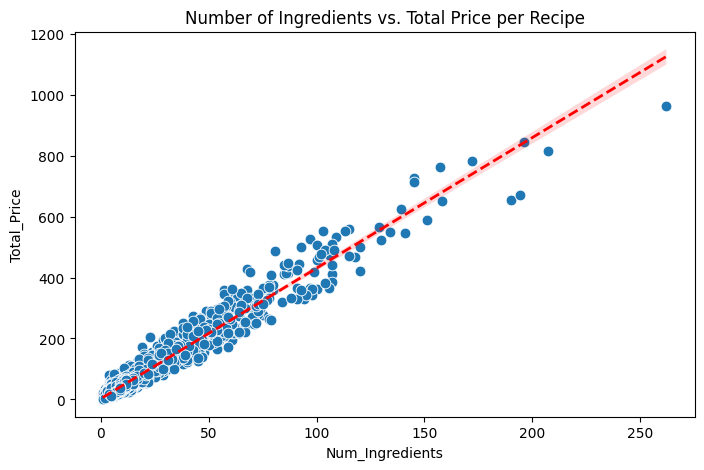

In [28]:
df = recipe.groupby("title").agg(Total_Price = ("PRICE_RETAIL", "sum"), Num_Ingredients = ("ingredient", "count")).reset_index()
print("The average number of ingredients is", df["Num_Ingredients"].mean())
print("The average total price is", df["Total_Price"].mean())
df = df.drop_duplicates(subset = ["title"])

row = recipe[recipe["title"] == "Chicken Casserole"]
# row.head(10)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x = "Num_Ingredients", y = "Total_Price", s = 60)
sns.regplot(data = df, x = "Num_Ingredients", y = "Total_Price", scatter = False, color = "red", line_kws={"lw":2, "ls":"--"})
plt.title("Number of Ingredients vs. Total Price per Recipe")
# plt.show()